In [1]:
import os
import json
import time
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from pprint import pprint
from datetime import datetime
from collections import Counter, defaultdict

### Data Retrieval Functions

In [2]:
# read in comment dictionary
def get_comment_dictionary(body=False):
    # read in comment dictionary from file
    if body:
        comment_dict_dir = '../../data/final/dictionaries/comments.json'
    else:
        comment_dict_dir = '../../data/final/dictionaries/comments-no-body.json'
        
    with open(comment_dict_dir,'r') as f:
            # load data
            file_data = json.load(f)
    
    return file_data   

In [3]:
# read in author dictionary
def get_author_dictionary():
    # read in comment dictionary from file
    comment_dict_dir = '../../data/final/dictionaries/authors.json'
        
    with open(comment_dict_dir,'r') as f:
            # load data
            file_data = json.load(f)
    
    return file_data

In [4]:
# read in submissions dictionary
def get_submission_dictionary(body=False):
    # read in comment dictionary from file
    if body:
        submission_dict_dir = '../../data/final/dictionaries/submissions.json'
    else:
        submission_dict_dir = '../../data/final/dictionaries/submissions-no-body.json'
          
    with open(submission_dict_dir,'r') as f:
            # load data
            file_data = json.load(f)
    
    return file_data

### Get dictionaries and preview contents

In [5]:
# create comment dict instance
comments = get_comment_dictionary()
len(comments)

14105159

In [6]:
# create author dict instance
authors = get_author_dictionary()
len(authors)

505476

In [7]:
# create instance of submission dict
submissions = get_submission_dictionary()
len(submissions)

1052598

In [8]:
comments.items()[:5]

[(u'dt6g6rt',
  {u'author_id': u'ensoul',
   u'link_id': u't3_7sl6wo',
   u'parent_id': u't1_dt6dq5m',
   u'score': 1,
   u'subreddit': u'ethtrader',
   u'time': u'2018-01-25 02:48'}),
 (u'cfm9pti',
  {u'author_id': u'coins1204',
   u'link_id': u't3_1ynczs',
   u'parent_id': u't1_cfm1ylx',
   u'score': u'7',
   u'subreddit': u'cryptocurrency'}),
 (u'c88rr1t',
  {u'author_id': u'stormsbrewing',
   u'link_id': u't3_17ti07',
   u'parent_id': u't1_c88qms2',
   u'score': u'1',
   u'subreddit': u'bitcoin'}),
 (u'cqzmgta',
  {u'author_id': u'Sukrim',
   u'link_id': u't3_34zj70',
   u'parent_id': u't1_cqzldn7',
   u'score': u'2',
   u'subreddit': u'bitcoin'}),
 (u'cn9anjy',
  {u'author_id': u'anti09',
   u'link_id': u't3_2qpozx',
   u'parent_id': u't1_cn9514j',
   u'score': u'0',
   u'subreddit': u'bitcoin'})]

In [9]:
authors.items()[1:5]

[(u'seven_71',
  {u'comment_id': [u'dplzxhh'],
   u'submission_id': [u'7553hy',
    u'75tz4x',
    u'78a2h5',
    u'7bze5x',
    u'7d1m8l',
    u'71mh1d']}),
 (u'umbertostrange',
  {u'comment_id': [u'dq2m1ur',
    u'dq2ma06',
    u'dq2me8p',
    u'dq2ny6l',
    u'dq37pt6',
    u'dpmgpuh',
    u'dpmh9as',
    u'dppjh42',
    u'dppjj83',
    u'dppn98b',
    u'dpppl0x',
    u'dpppufm',
    u'dppq4x8',
    u'dppqewp',
    u'dppqq74',
    u'dppquo9',
    u'dppr8qt',
    u'dpprobr',
    u'dpq5g96',
    u'dpr0n2a',
    u'dpr0r51',
    u'dpsesjx',
    u'dpseu1t',
    u'dpsh22b',
    u'dpt1d29',
    u'dpt1gcl',
    u'dpt1t9z',
    u'dpt2maa',
    u'dpubi3g',
    u'dpubz9x',
    u'dpvhqw1',
    u'dpvi3cq',
    u'dpvi6s4',
    u'dpvikk3',
    u'dpviq85',
    u'dpw6k8e',
    u'dpw6lrq',
    u'dpwsqq1',
    u'dpxpo2n',
    u'dpxppru',
    u'dpxqect',
    u'dpymhm6',
    u'dpzahle',
    u'dq0kmis',
    u'dq18s6f',
    u'dq192u2',
    u'dq198kl',
    u'dq48ywu',
    u'dq4c8z3',
    u'dqdghsn',
    u'

In [10]:
comments.items()[:5]

[(u'dt6g6rt',
  {u'author_id': u'ensoul',
   u'link_id': u't3_7sl6wo',
   u'parent_id': u't1_dt6dq5m',
   u'score': 1,
   u'subreddit': u'ethtrader',
   u'time': u'2018-01-25 02:48'}),
 (u'cfm9pti',
  {u'author_id': u'coins1204',
   u'link_id': u't3_1ynczs',
   u'parent_id': u't1_cfm1ylx',
   u'score': u'7',
   u'subreddit': u'cryptocurrency'}),
 (u'c88rr1t',
  {u'author_id': u'stormsbrewing',
   u'link_id': u't3_17ti07',
   u'parent_id': u't1_c88qms2',
   u'score': u'1',
   u'subreddit': u'bitcoin'}),
 (u'cqzmgta',
  {u'author_id': u'Sukrim',
   u'link_id': u't3_34zj70',
   u'parent_id': u't1_cqzldn7',
   u'score': u'2',
   u'subreddit': u'bitcoin'}),
 (u'cn9anjy',
  {u'author_id': u'anti09',
   u'link_id': u't3_2qpozx',
   u'parent_id': u't1_cn9514j',
   u'score': u'0',
   u'subreddit': u'bitcoin'})]

In [11]:
submissions.items()[:5]

[(u'4jkdhy',
  {u'author': [u'munteanualex_ro'],
   u'body': [u'Original thread: https://redd.it/4iwfsx\nAfter the execution, the malware send some data to bnaf12.no-ip.biz.  This is the attacker website http://paulie[.]rocks/\n\nhttp://imgur.com/pPinOgK\n\nhttps://bitcointalk.org/index.php?action=profile;u=838056\nhttps://www.reddit.com/user/PaulieGolding\nhttps://bazaarbay.org/@pauliegolding\nhttps://www.bustabit.com/user/PaulieGolding'],
   u'comment_id': [u'd37fjem',
    u'd37gxkg',
    u'd37k317',
    u'd37kbpv',
    u'd37lxoy',
    u'd37lz3g',
    u'd38qxcv',
    u'd39fzj8'],
   u'subreddit': [u'btc'],
   u'time': [u'2016-05-16 09:28:23'],
   u'title': [u'I found some information about the guy who stole $10,000 in cryptos']}),
 (u'4l0fxz',
  {u'author': [u'heliumcraft'],
   u'body': [u''],
   u'comment_id': [u'd3jx5z0'],
   u'subreddit': [u'ethereum'],
   u'time': [u'2016-05-25 16:18:15'],
   u'title': [u'EtherSim 0.4.0 - Ethereum simulator for testing and development purposes']}

In [12]:
# create DIRECTED graph of comment_poster from edge_list
def get_edge_list(score=False, multi=False):
    if score:
        filename='commenter-poster.txt'
    else:
        filename='commenter-poster_no-score.txt'
    # read in edge list of commenters and submitters
    if multi:
        return nx.read_edgelist('../../data/final/graph_tools/' + filename, create_using=nx.MultiDiGraph())
    else:
        return nx.read_edgelist('../../data/final/graph_tools/' + filename, create_using=nx.DiGraph())

### Reddit Network as Directed Graph

In [13]:
# read in graph of edge-list
G = get_edge_list(score=False, multi=False)

In [14]:
G.name = 'single'

In [15]:
# drop specific nodes
drop_nodes = ['AutoModerator','[deleted]']
G.remove_nodes_from(drop_nodes)

In [16]:
# show number of edges (replies tied to submissions)
G.number_of_edges()

5011529

In [17]:
# show number of nodes (ids of commenters or submitters)
G.number_of_nodes()

463536

### Reddit Network as Directed Multi-Graph

In [18]:
# read in graph of edge-list
G_multi = get_edge_list(score=False, multi=True)

In [19]:
G_multi.name = 'multi'

In [20]:
# drop specific nodes
drop_nodes = ['AutoModerator','[deleted]']
G_multi.remove_nodes_from(drop_nodes)

In [21]:
# show number of edges (replies tied to submissions)
G_multi.number_of_edges()

9923573

In [22]:
# show number of nodes (ids of commenters or submitters)
G_multi.number_of_nodes()

463536

### Analysis - Plotting

In [23]:
def plot_out_degree_distribution(G,name='graph'):
    # plot degree dist for input Graph
    # get list of (x,y) pairs for degrees and frequency
    # and divide into final x and y sets
    degrees = dict()
    for node in G.nodes():
        deg = G.out_degree(node)
        degrees[deg] = degrees.get(deg,0) + 1
    final_set = sorted(degrees.items(), key=lambda x: x[1],reverse=True)
    
    # sort final x/y inputs for plot
    final_x, final_y = [k for (k,v) in final_set if v > 0 and k > 0], [v for (k,v) in final_set if v > 0 and k > 0]
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(final_x,final_y)
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title('Out-Degrees of {}'.format(name))
    plt.xlabel('Out-Degree (log-10)')
    plt.ylabel('Count of Instances (log-10)')
    plt.show()

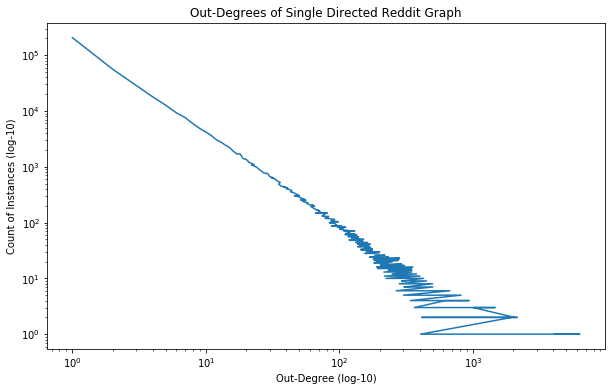

In [24]:
# plot single Graph
plot_out_degree_distribution(G, name='Single Directed Reddit Graph')

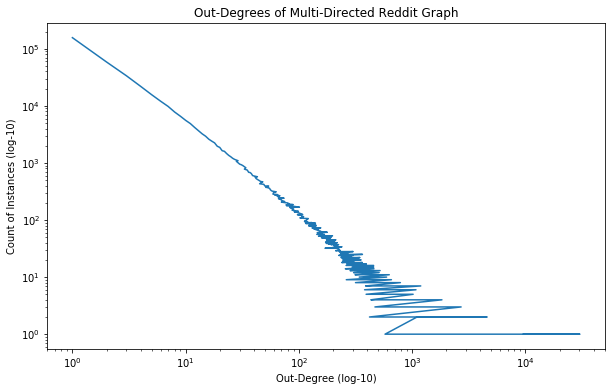

In [25]:
# plot multi Graph
plot_out_degree_distribution(G_multi, name='Multi-Directed Reddit Graph')

### Analysis - Plotting

### Analysis - Data-Collection

num_cc = len([x for x in nx.connected_components(G.to_undirected())])
print(num_cc)

num_scc = len([x for x in nx.strongly_connected_components(G)])
print(num_scc)

num_wcc = len([x for x in nx.weakly_connected_components(G)])
print(num_wcc)

avg_clust_coef = nx.algorithms.average_clustering(G.to_undirected())
print(avg_clust_coef)

avg_degree_conn = nx.algorithms.average_degree_connectivity(G)
print(avg_degree_conn)

avg_node_conn = nx.algorithms.average_node_connectivity(G)
print(avg_node_conn)

avg_neighb_deg = nx.algorithms.average_neighbor_degree(G)
print(avg_neighb_deg)

avg_shrt_path = nx.algorithms.average_shortest_path_length(G)
print(avg_shrt_path)

In [26]:
def get_graph_statistics(graph_list):
    
    start = time.time()
    
    # collect all stats desired for graph
    output = defaultdict(list)
    
    for i, graph in enumerate(graph_list):
        print('Gathering stats on graph {}...'.format(i + 1))
        
        # collect stats on graph on connected components
        #output['num_cc'].append(len([x for x in nx.connected_components(G.to_undirected())]))
        #output['num_scc'].append(len([x for x in nx.strongly_connected_components(G)]))
        #output['num_wcc'].append(len([x for x in nx.weakly_connected_components(G)]))

        # run averaging calculations
        output['avg_clust_coef'].append(nx.algorithms.average_clustering(G.to_undirected()))
        output['avg_degree_conn'].append(nx.algorithms.average_degree_connectivity(G))
        output['avg_node_conn'].append(nx.algorithms.average_node_connectivity(G))
        output['avg_neighb_deg'].append(nx.algorithms.average_neighbor_degree(G))
        output['avg_shrt_path'].append(nx.algorithms.average_shortest_path_length(G))
    
    # create DataFrame and write out to disc
    df = pd.DataFrame(output)
    df.to_csv('../../data/final/output/graph_stats.csv',index=False)
    
    end = time.time()
    print('Process took {:.2f} seconds'.format(end-start))
    
    return df

In [ ]:
graphs = [G, G_multi]

In [ ]:
stats = get_graph_statistics(graphs)

Gathering stats on graph 1...


In [29]:
new_row = dict()
new_row['a'] = ['5','4']
new_row['b'] = [5,334]
new_row

{'a': ['5', '4'], 'b': [5, 334]}

In [30]:
len(example_df)

NameError: name 'example_df' is not defined

In [ ]:
test_df = pd.DataFrame.from_dict(new_row)
test_df

In [ ]:
G.name = 'test'

In [ ]:
G.name

In [ ]:
def collect_statistics(input_graphs):
    # return DF with statistical info on input graphs
    